In [1]:
import matplotlib.pyplot as plt
import pymongo
from sshtunnel import SSHTunnelForwarder
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/home/miguel/.local/share/virtualenvs/scalable-simulations-8cB5xf1K/lib/python3.8/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
MONGO_HOST = 'TUD-tm2'
MONGO_DB = 'scalable-simulations'
PKEY = '~/.ssh/id_rsa'
print("Trying to connect to mongoDB '{}'".format(MONGO_DB))
server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_pkey=PKEY,
    remote_bind_address=('127.0.0.1', 27017)
    )
server.start()
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client[MONGO_DB]


Trying to connect to mongoDB 'scalable-simulations'


In [4]:
global_means = []
global_stds = []
local_means = []
local_stds = []
fixed_means = []
fixed_stds = []
fixed_means2 = []
fixed_stds2 = []

# NODE 12

global_values = []
global_ids = [581, 582, 583, 584, 585]
for id in global_ids:
    global_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
global_means.append(np.mean(global_values, axis=0))
global_stds.append(np.std(global_values, axis=0)/np.sqrt(len(global_values)))

local_values = []
local_ids = [465, 466, 470, 471, 472]
for id in local_ids:
    local_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
local_means.append(np.mean(local_values, axis=0))
local_stds.append(np.std(local_values, axis=0)/np.sqrt(len(local_values)))


fixed_values = []
# fixed_ids = [596, 597, 598]
fixed_ids = [4845, 4844, 4843, 4842, 4841]
for id in fixed_ids:
    fixed_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
fixed_means.append(np.mean(fixed_values, axis=0))
fixed_stds.append(np.std(fixed_values, axis=0)/np.sqrt(len(fixed_values)))


# fixed_values2 = []
# fixed_ids2 = [467, 468, 469, 473, 474, 475]
# for id in fixed_ids2:
#     fixed_values2.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
# fixed_means2.append(np.mean(fixed_values2, axis=0))
# fixed_stds2.append(np.std(fixed_values2, axis=0)/np.sqrt(len(fixed_values2)))

# NODE 18

global_values = []
global_ids = [617, 618, 623, 633]
for id in global_ids:
    global_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
global_means.append(np.mean(global_values, axis=0))
global_stds.append(np.std(global_values, axis=0)/np.sqrt(len(global_values)))

local_values = []
local_ids = [607, 608, 609, 611, 632]
for id in local_ids:
    local_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
local_means.append(np.mean(local_values, axis=0))
local_stds.append(np.std(local_values, axis=0)/np.sqrt(len(local_values)))


# fixed_values2 = []
# fixed_ids2 = [612, 613, 614, 616]
# for id in fixed_ids2:
#     fixed_values2.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
# fixed_means2.append(np.mean(fixed_values2, axis=0))
# fixed_stds2.append(np.std(fixed_values2, axis=0)/np.sqrt(len(fixed_values2)))


fixed_values = []
fixed_ids = [4840, 4839, 4838, 4833, 4832]
for id in fixed_ids:
    fixed_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
fixed_means.append(np.mean(fixed_values, axis=0))
fixed_stds.append(np.std(fixed_values, axis=0)/np.sqrt(len(fixed_values)))

actuated_means = [[162, 162], [167, 167]]

agent_training_time_GS = 6.16
agent_training_time_IALS = 2.13
AIP_training_time = 36.17/3600
data_collection_time = 103.60/3600

<Figure size 1296x1584 with 0 Axes>

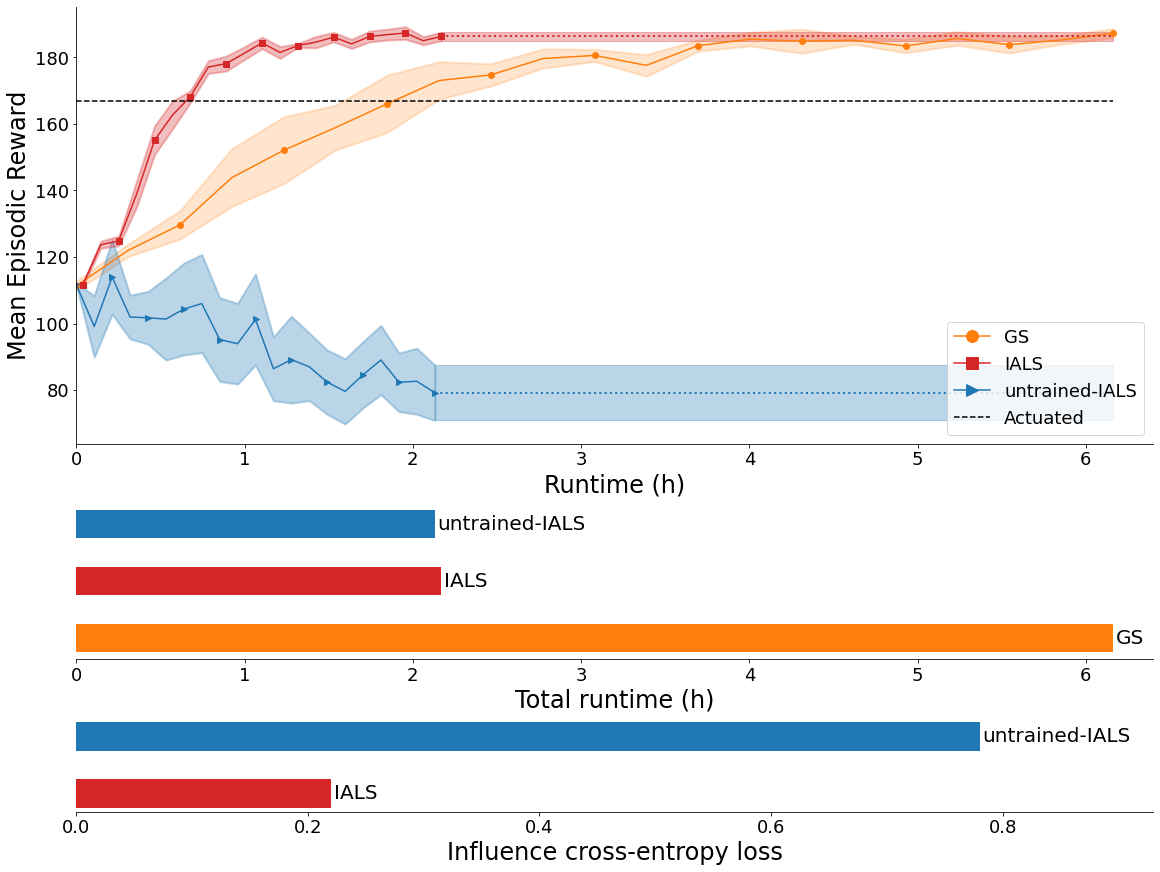

In [26]:
plt.figure(figsize=(18, 22))
fig, ax = plt.subplots(3,1, figsize=(16,12), gridspec_kw={'height_ratios': [1.4, 0.5, 0.3]}, constrained_layout = True)
# plt.subplots_adjust(left=0.05, bottom=0.05, right=None, top=0.94, wspace=None, hspace=0.3)


for i in [1]:
    local_mean = local_means[i]
    local_std = local_stds[i]
    global_mean = global_means[i]
    global_std = global_stds[i]
    fixed_mean = fixed_means[i]
    fixed_std = fixed_stds[i]
    # fixed_mean2 = fixed_means2[i]
    # fixed_std2 = fixed_stds2[i]

    # GLOBAL
    times = np.linspace(0, agent_training_time_GS, 21)
    ax[0].plot(times, global_mean, color='C1', label='GS', marker='o', markevery=2)
    ax[0].fill_between(times, global_mean-global_std, global_mean+global_std, alpha=0.2, color='C1', linewidth=2)

    # FIXED 0.5
    # times = np.linspace(0, 1.66, 21)
    times = np.linspace(0, agent_training_time_IALS, 21)
    ax[0].plot(times, fixed_mean, color='C0', label='untrained-IALS', marker='>', markevery=2)
    ax[0].fill_between(times, fixed_mean-fixed_std, fixed_mean+fixed_std, alpha=0.3, color='C0', linewidth=2)


    # times = np.linspace(1.66, 6.16, 2)
    times = np.linspace(agent_training_time_IALS, agent_training_time_GS, 2)
    values = np.array([np.mean(fixed_mean[-1:]), np.mean(fixed_mean[-1:])])
    std = np.array([np.mean(fixed_std[-1:]), np.mean(fixed_std[-1:])])
    ax[0].plot(times, values, color='C0', linestyle='dotted', linewidth=2)
    ax[0].fill_between(times, values-std, values+std, alpha=0.3, color='C0')

    # # FIXED 0.1
    # times = np.linspace(0, 1.66, 21)
    # ax[i].plot(times, fixed_mean2, color='C0', label='F-IALS (0.1)', marker='>', markevery=2)
    # ax[i].fill_between(times, fixed_mean2-fixed_std2, fixed_mean2+fixed_std2, alpha=0.3, color='C0', linewidth=2)


    # times = np.linspace(1.66, 6.16, 2)
    # values = np.array([np.mean(fixed_mean2[-1:]), np.mean(fixed_mean2[-1:])])
    # std = np.array([np.mean(fixed_std2[-1:]), np.mean(fixed_std2[-1:])])
    # ax[i].plot(times, values, color='C0', linestyle='dotted', linewidth=2)
    # ax[i].fill_between(times, values-std, values+std, alpha=0.3, color='C0')

    
    ax[0].set_xlim(0, 6.4)
    # ax[i].axes.get_xaxis().set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)

    #LOCAL
    times = np.linspace(0, data_collection_time + AIP_training_time, 2)
    values = np.array([np.mean(local_mean[0]), np.mean(local_mean[0])])
    std = np.array([np.mean(local_std[0]), np.mean(local_std[0])])
    ax[0].plot(times, values, color='C3', linestyle='dotted', linewidth=2)
    ax[0].fill_between(times, values-std, values+std, alpha=0.3, color='C3')

    local_times = np.linspace(data_collection_time + AIP_training_time, data_collection_time + AIP_training_time + agent_training_time_IALS, 21)
    ax[0].plot(local_times, local_mean, color='C3', label='IALS', marker='s', markevery=2)
    ax[0].fill_between(local_times, local_mean-local_std, local_mean+local_std, alpha=0.3, color='C3', linewidth=2)

    times = np.linspace(data_collection_time + AIP_training_time + agent_training_time_IALS, agent_training_time_GS, 2)
    values = np.array([np.mean(local_mean[-1:]), np.mean(local_mean[-1:])])
    std = np.array([np.mean(local_std[-1:]), np.mean(local_std[-1:])])
    ax[0].plot(times, values, color='C3', linestyle='dotted', linewidth=2)
    ax[0].fill_between(times, values-std, values+std, alpha=0.3, color='C3')
    # ax[0].set_title(str(i+1), y=1.0, x=0.05, pad=-14, fontsize=20)

    # ACTUATED
    times = np.linspace(0, 6.16, 2)
    ax[0].plot(times, actuated_means[i], color='black', label='Actuated',linestyle='dashed')

    ax[0].set_xlabel('Runtime (h)', fontsize=24)
    ax[0].set_ylabel('Mean Episodic Reward', fontsize=24)
    ax[0].tick_params(labelsize=18)

# RUNTIMES BAR PLOT
# barh = ax[2].barh([0,1,2,3],[6.16, 2.33, 1.66, 1.66], height=0.5, color=['C1', 'C3', 'C0', 'C2'])
barh = ax[1].barh([0,1,2],[agent_training_time_GS, data_collection_time + AIP_training_time + agent_training_time_IALS, agent_training_time_IALS], height=0.5, color=['C1', 'C3', 'C0'])
ax[1].set_xlabel('Total runtime (h)', fontsize=24)
ax[1].axes.get_yaxis().set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlim(0, 6.4)
ax[1].bar_label(barh, labels=['GS', 'IALS', 'untrained-IALS'], fontsize=20, padding=3)
ax[1].tick_params(labelsize=18)
# ax[1].set_frame_on(False)

# CROSSENTROPY LOSS
# barh = ax[3].barh([0,1,2],[0.8, 1.25, 2.7], height=0.5, color=['C3', 'C0', 'C2'])
barh = ax[2].barh([0,1],[0.22, 0.78], height=0.5, color=['C3', 'C0'])
ax[2].set_xlabel('Influence cross-entropy loss', fontsize=24)
ax[2].axes.get_yaxis().set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].set_xlim(0, 0.93)
# ax[3].bar_label(barh, labels=['IALS', 'F-IALS 0.1', 'F-IALS 0.5'], fontsize=18, padding=3)
ax[2].bar_label(barh, labels=['IALS', 'untrained-IALS'], fontsize=20, padding=3)
ax[2].tick_params(labelsize=18)

# times = np.linspace(0, 1.2, 21)
# ax[i].plot(times, fixed_mean2, color='C2')
# ax[i].fill_between(times, fixed_mean2-fixed_std2, fixed_mean2+fixed_std2, alpha=0.3, color='C2', linewidth=2)
# ax[i].xlim(0, 6.16)


# times = np.linspace(1.2, 6.16, 2)
# values = np.array([np.mean(fixed_mean2[-1:]), np.mean(fixed_mean2[-1:])])
# std = np.array([np.mean(fixed_std2[-1:]), np.mean(fixed_std2[-1:])])
# ax[i].plot(times, values, color='C2', linestyle='dashed', linewidth=2)
# ax[i].fill_between(times, values-std, values+std, alpha=0.3, color='C2')
pos = [0,2,1,3]
handles, labels = ax[0].get_legend_handles_labels()
handles = np.array(handles)[pos]
labels = np.array(labels)[pos]
# fig.legend(handles, labels, bbox_to_anchor = [0.73, 1], ncol=4, fontsize=18, markerscale=2)
ax[0].legend(handles, labels, loc=4, ncol=1, fontsize=18, markerscale=2) #bbox_to_anchor = [0.65, 1]
# plt.subplots_adjust(wspace=0, hspace=[0, 0, 0.3])
# fig.text(0, 0.7, 'Mean Episodic Reward', va='center', rotation='vertical', fontsize=24)
# ax[0].tick_params(labelsize=12)
plt.savefig('traffic_plot.pdf')


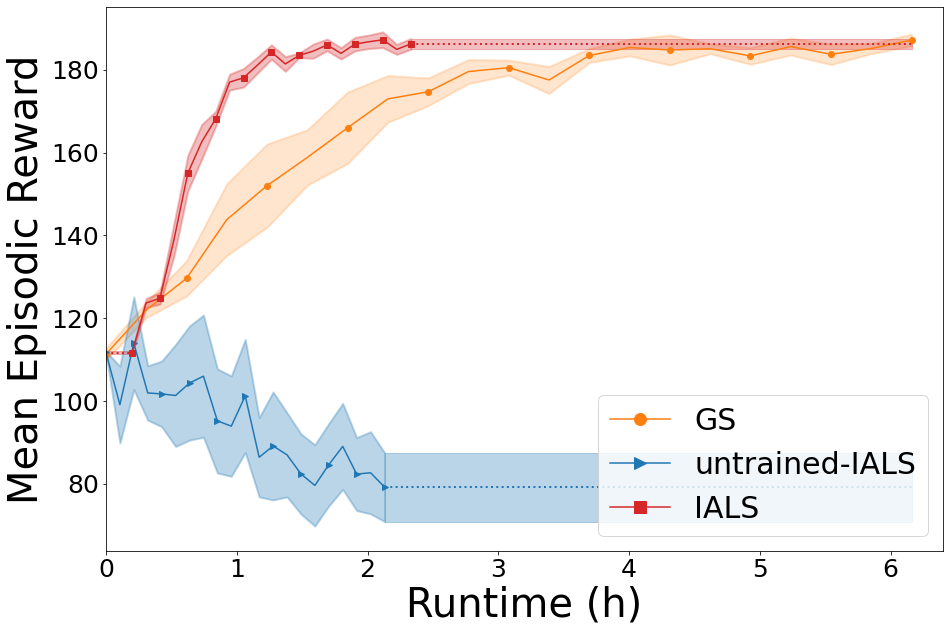

In [19]:
plt.figure(figsize=(15, 10))

for i in [1]:
    local_mean = local_means[i]
    local_std = local_stds[i]
    global_mean = global_means[i]
    global_std = global_stds[i]
    fixed_mean = fixed_means[i]
    fixed_std = fixed_stds[i]
    # fixed_mean2 = fixed_means2[i]
    # fixed_std2 = fixed_stds2[i]

    # GLOBAL
    times = np.linspace(0, 6.16, 21)
    plt.plot(times, global_mean, color='C1', label='GS', marker='o', markevery=2)
    plt.fill_between(times, global_mean-global_std, global_mean+global_std, alpha=0.2, color='C1', linewidth=2)

    # FIXED 0.5
    # times = np.linspace(0, 1.66, 21)
    times = np.linspace(0, 2.13, 21)
    plt.plot(times, fixed_mean, color='C0', label='untrained-IALS', marker='>', markevery=2)
    plt.fill_between(times, fixed_mean-fixed_std, fixed_mean+fixed_std, alpha=0.3, color='C0', linewidth=2)


    # times = np.linspace(1.66, 6.16, 2)
    times = np.linspace(2.13, 6.16, 2)
    values = np.array([np.mean(fixed_mean[-1:]), np.mean(fixed_mean[-1:])])
    std = np.array([np.mean(fixed_std[-1:]), np.mean(fixed_std[-1:])])
    plt.plot(times, values, color='C0', linestyle='dotted', linewidth=2)
    plt.fill_between(times, values-std, values+std, alpha=0.3, color='C0')

    # # FIXED 0.1
    # times = np.linspace(0, 1.66, 21)
    # ax[i].plot(times, fixed_mean2, color='C0', label='F-IALS (0.1)', marker='>', markevery=2)
    # ax[i].fill_between(times, fixed_mean2-fixed_std2, fixed_mean2+fixed_std2, alpha=0.3, color='C0', linewidth=2)


    # times = np.linspace(1.66, 6.16, 2)
    # values = np.array([np.mean(fixed_mean2[-1:]), np.mean(fixed_mean2[-1:])])
    # std = np.array([np.mean(fixed_std2[-1:]), np.mean(fixed_std2[-1:])])
    # ax[i].plot(times, values, color='C0', linestyle='dotted', linewidth=2)
    # ax[i].fill_between(times, values-std, values+std, alpha=0.3, color='C0')

    
    plt.xlim(0, 6.4)
    # ax[i].axes.get_xaxis().set_visible(False)
    # plt.spines['right'].set_visible(False)
    # plt.spines['top'].set_visible(False)

    #LOCAL
    times = np.linspace(0, 0.2, 2)
    values = np.array([np.mean(local_mean[0]), np.mean(local_mean[0])])
    std = np.array([np.mean(local_std[0]), np.mean(local_std[0])])
    plt.plot(times, values, color='C3', linestyle='dotted', linewidth=2)
    plt.fill_between(times, values-std, values+std, alpha=0.3, color='C3')

    local_times = np.linspace(0.2, 2.33, 21)
    plt.plot(local_times, local_mean, color='C3', label='IALS', marker='s', markevery=2)
    plt.fill_between(local_times, local_mean-local_std, local_mean+local_std, alpha=0.3, color='C3', linewidth=2)

    times = np.linspace(2.33, 6.16, 2)
    values = np.array([np.mean(local_mean[-1:]), np.mean(local_mean[-1:])])
    std = np.array([np.mean(local_std[-1:]), np.mean(local_std[-1:])])
    plt.plot(times, values, color='C3', linestyle='dotted', linewidth=2)
    plt.fill_between(times, values-std, values+std, alpha=0.3, color='C3')
    # ax[0].set_title(str(i+1), y=1.0, x=0.05, pad=-14, fontsize=20)

    # # ACTUATED
    # times = np.linspace(0, 6.16, 2)
    # plt.plot(times, actuated_means[i], color='black', label='Actuated',linestyle='dashed')

    plt.xlabel('Runtime (h)', fontsize=40)
    plt.ylabel('Mean Episodic Reward', fontsize=40)
    plt.legend(loc=4, ncol=1, fontsize=30, markerscale=2)

    plt.tick_params(labelsize=25)
plt.savefig('traffic_plot_poster.pdf')
